# Multidimensional Coordinates example using CMIP6 Pangeo ocean model data

## Import python packages

In [1]:
import xarray as xr
xr.set_options(display_style='html')
import intake
import cftime
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import cartopy.crs as ccrs
import numpy as np
%matplotlib inline

## Open CMIP6 online catalog

In [2]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
col

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,709
grid_label,10
zstore,520279
dcpp_init_year,60


## Search corresponding data 

In [3]:
cat = col.search(source_id=['MPI-ESM1-2-HR'], experiment_id=['historical'], table_id=['Omon'], variable_id=['chl'], member_id=['r9i1p1f1'])
cat.df


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,MPI-M,MPI-ESM1-2-HR,historical,r9i1p1f1,Omon,chl,gn,gs://cmip6/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/hist...,NaN,20190710


## Create dictionary from the list of datasets we found
- This step may take several minutes so be patient!

In [4]:
dset_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [5]:
list(dset_dict.keys())

['CMIP.MPI-M.MPI-ESM1-2-HR.historical.Omon.gn']

## Open dataset

- Use `xarray` python package to analyze netCDF dataset
- `open_dataset` allows to get all the metadata without loading data into memory. 
- with `xarray`, we only load into memory what is needed.

In [6]:
dset = dset_dict['CMIP.MPI-M.MPI-ESM1-2-HR.historical.Omon.gn']
dset

<xarray.Dataset>
Dimensions:             (bnds: 2, i: 802, j: 404, lev: 40, member_id: 1, time: 1980, vertices: 4)
Coordinates:
  * i                   (i) int32 0 1 2 3 4 5 6 ... 795 796 797 798 799 800 801
  * j                   (j) int32 0 1 2 3 4 5 6 ... 397 398 399 400 401 402 403
    latitude            (j, i) float64 dask.array<chunksize=(404, 802), meta=np.ndarray>
  * lev                 (lev) float64 6.0 17.0 27.0 ... 5.17e+03 5.72e+03
    lev_bnds            (lev, bnds) float64 dask.array<chunksize=(40, 2), meta=np.ndarray>
    longitude           (j, i) float64 dask.array<chunksize=(404, 802), meta=np.ndarray>
  * time                (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:0...
    time_bnds           (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
  * member_id           (member_id) <U8 'r9i1p1f1'
Dimensions without coordinates: bnds, vertices
Data variables:
    chl                 (member_id, time, lev, j, i) float32 dask.array<chunksize=(1, 2, 40, 404, 802), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 dask.array<chunksize=(404, 802, 4), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float64 dask.array<chunksize=(404, 802, 4), meta=np.ndarray>
Attributes: (12/50)
    Conventions:             CF-1.7 CMIP-6.2
    activity_id:             CMIP
    branch_method:           standard
    branch_time_in_child:    0.0
    branch_time_in_parent:   146096.0
    cmor_version:            3.5.0
    ...                      ...
    title:                   MPI-ESM1-2-HR output prepared for CMIP6
    tracking_id:             hdl:21.14100/4e922d88-7711-4df6-9bdd-b849acd45a7...
    variable_id:             chl
    variant_label:           r9i1p1f1
    intake_esm_varname:      ['chl']
    intake_esm_dataset_key:  CMIP.MPI-M.MPI-ESM1-2-HR.historical.Omon.gn

### Get metadata corresponding to Chl

In [7]:
print(dset['chl'])

<xarray.DataArray 'chl' (member_id: 1, time: 1980, lev: 40, j: 404, i: 802)>
dask.array<broadcast_to, shape=(1, 1980, 40, 404, 802), dtype=float32, chunksize=(1, 2, 40, 404, 802), chunktype=numpy.ndarray>
Coordinates:
  * i          (i) int32 0 1 2 3 4 5 6 7 8 ... 794 795 796 797 798 799 800 801
  * j          (j) int32 0 1 2 3 4 5 6 7 8 ... 396 397 398 399 400 401 402 403
    latitude   (j, i) float64 dask.array<chunksize=(404, 802), meta=np.ndarray>
  * lev        (lev) float64 6.0 17.0 27.0 37.0 ... 4.67e+03 5.17e+03 5.72e+03
    longitude  (j, i) float64 dask.array<chunksize=(404, 802), meta=np.ndarray>
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * member_id  (member_id) <U8 'r9i1p1f1'
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Sum of chlorophyll from all phytoplankton group concentra...
    history:        2019-08-30T07:10:19Z altered by CMOR: replaced missi

In [8]:
dset.time.values

array([cftime.DatetimeProlepticGregorian(1850, 1, 16, 12, 0, 0, 0),
       cftime.DatetimeProlepticGregorian(1850, 2, 15, 0, 0, 0, 0),
       cftime.DatetimeProlepticGregorian(1850, 3, 16, 12, 0, 0, 0), ...,
       cftime.DatetimeProlepticGregorian(2014, 10, 16, 12, 0, 0, 0),
       cftime.DatetimeProlepticGregorian(2014, 11, 16, 0, 0, 0, 0),
       cftime.DatetimeProlepticGregorian(2014, 12, 16, 12, 0, 0, 0)],
      dtype=object)

# Visualization

## shift longitude from 0,360 to -180,180

In [9]:
dset.coords['longitude'] = (dset['longitude'] + 180) % 360 - 180

In [10]:
dset['chl'].latitude.values.min(), dset['chl'].latitude.values.max()

(-78.71779338013427, 89.76311914726304)

In [11]:
dset['chl'].longitude.values.min(), dset['chl'].longitude.values.max()

(-179.99408443971072, 179.99893486577713)

## Select geographical area, time and level

In [12]:
dset_selection = dset.isel(time=0, lev=0).where( (dset.latitude > 50) & (dset.longitude > -30) & (dset.longitude < 30) ).squeeze()

In [13]:
def polarCentral_set_latlim(lat_lims, ax):
    ax.set_extent([-180, 180, lat_lims[0], lat_lims[1]], ccrs.PlateCarree())
    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)

/opt/conda/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


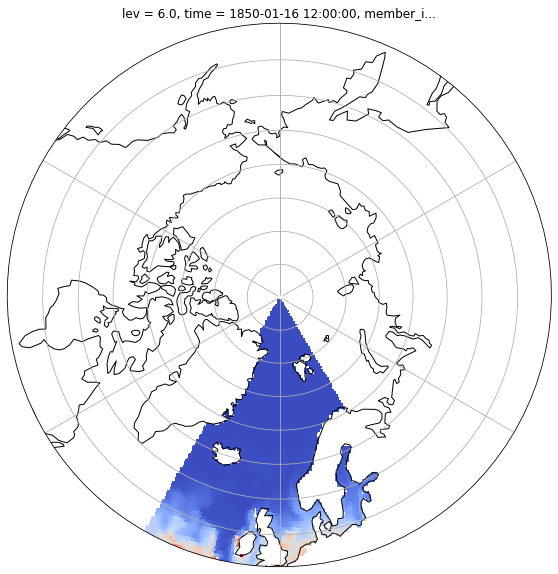

In [14]:
fig = plt.figure(1, figsize=[10,10])

# Fix extent
minval = 0
maxval = 100.

ax = plt.subplot(1, 1, 1, projection=ccrs.NorthPolarStereo())
ax.coastlines()
ax.gridlines()
polarCentral_set_latlim([50,90], ax)
dset_selection.chl.plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="longitude", y="latitude", add_colorbar=False, cmap='coolwarm')